In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#!pip3 install matplotlib

In [3]:
x = ['which book is this', 'this is book and this is math']

In [4]:
cv = CountVectorizer()
count = cv.fit_transform(x)

In [5]:
count.toarray() #BoW

array([[0, 1, 1, 0, 1, 1],
       [1, 1, 2, 1, 2, 0]])

In [6]:
cv.get_feature_names()

['and', 'book', 'is', 'math', 'this', 'which']

In [7]:
bow = pd.DataFrame(count.toarray(), columns = cv.get_feature_names())
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


# Term frequency

In [8]:
tf = bow.copy()
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index, col] = tf.loc[index, col]/sum(row[1].values)

In [9]:
tf

,and,book,is,math,this,which
0,0.000000,0.250000,0.250000,0.000000,0.250000,0.25
1,0.142857,0.142857,0.285714,0.142857,0.285714,0.00


# Inverse Document Frequency IDF
idf = log( (1 + N)/(n + 1)) + 1 used in sklearn when smooth_idf = True

where, N is the total number of rows and n is the number of rows in which the word was present.

In [10]:
bb = bow.astype('bool')
bb

,and,book,is,math,this,which
0,False,True,True,False,True,True
1,True,True,True,True,True,False


In [11]:
bb.columns

Index(['and', 'book', 'is', 'math', 'this', 'which'], dtype='object')

# TFIDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
x

['which book is this', 'this is book and this is math']

In [14]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(x)

In [15]:
X

<2x6 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [16]:
print(X.toarray())

[[0.         0.44832087 0.44832087 0.         0.44832087 0.63009934]
 [0.39054766 0.27787788 0.55575576 0.39054766 0.55575576 0.        ]]


In [17]:
tfidf.idf_

array([1.40546511, 1.        , 1.        , 1.40546511, 1.        ,
       1.40546511])

In [19]:
df = pd.read_csv('spam.tsv',sep='\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [20]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [21]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

# BALANCE DATA

In [24]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [25]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [26]:
ham = ham.sample(spam.shape[0])

In [79]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [80]:
data = ham.append(spam, ignore_index=True)

In [81]:
data.sample(5)

,label,message,length,punct
579,ham,WOT U WANNA DO THEN MISSY?,26,1
1358,spam,Gr8 new service - live sex video chat on your ...,160,3
1367,spam,"Mila, age23, blonde, new in UK. I look sex wit...",158,12
1055,spam,"Thanks for your ringtone order, ref number K71...",156,4
1014,spam,"FreeMsg Hey U, i just got 1 of these video/pic...",156,8


In [82]:
data.label.value_counts()

ham     747
spam    747
Name: label, dtype: int64

# Exploratory Data Analysis
Data Visualization Course https://bit.ly/udemy95off_kgptalkie

What you will learn in this course

✔✔ Learn complete Exploratory Data Analysis on latest Covid-19 Dataset

✔✔ Learn EDA on Kaggle's Boston Housing and Titanic Datasets

✔✔ Complete EDA on IPL Cricket Matches, FIFA World Cup Matches, and Text Data

✔✔ And so much more

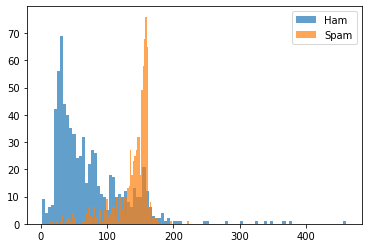

In [83]:
plt.hist(ham['length'], bins = 100, alpha = 0.7, label='Ham')
plt.hist(spam['length'], bins = 100, alpha = 0.7, label = 'Spam')
plt.legend()
plt.show()

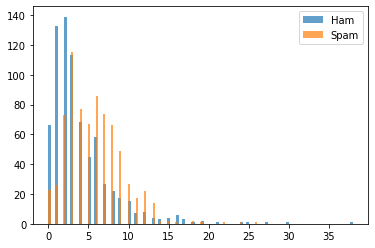

In [84]:
plt.hist(ham['punct'], bins = 100, alpha = 0.7, label='Ham')
plt.hist(spam['punct'], bins = 100, alpha = 0.7, label = 'Spam')
plt.legend()
plt.show()

# Data Preparation for Training¶

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [87]:
data.head()

,label,message,length,punct
0,ham,I REALLY NEED 2 KISS U I MISS U MY BABY FROM U...,57,0
1,ham,Don‘t give a flying monkeys wot they think and...,103,2
2,ham,All sounds good. Fingers . Makes it difficult ...,53,2
3,ham,Oh:)as usual vijay film or its different?,41,3
4,ham,It's not that you make me cry. It's just that ...,191,8


In [88]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['message'])

In [89]:
X = X.toarray()

In [90]:
X.shape

(1494, 4633)

In [91]:
y=data['label']
y

0        ham
1        ham
2        ham
3        ham
4        ham
        ... 
1489    spam
1490    spam
1491    spam
1492    spam
1493    spam
Name: label, Length: 1494, dtype: object

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [93]:
X_train.shape,X_test.shape

((1195, 4633), (299, 4633))

# Training Your First Text Classifier


In [94]:
clf = RandomForestClassifier(n_estimators=100, n_jobs= -1) #n_jobs is for using all cores to train the model

In [95]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [96]:
y_pred = clf.predict(X_test)

In [97]:
confusion_matrix(y_test, y_pred)

array([[149,   1],
       [ 18, 131]])

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.89      0.99      0.94       150
        spam       0.99      0.88      0.93       149

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



# SVM

In [99]:
clf = SVC(C=1000,gamma='auto')

In [100]:
clf.fit(X_train, y_train)

SVC(C=1000, gamma='auto')

In [101]:
y_pred = clf.predict(X_test)

In [102]:
confusion_matrix(y_test, y_pred)

array([[149,   1],
       [ 18, 131]])

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.89      0.99      0.94       150
        spam       0.99      0.88      0.93       149

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



# Test the Data

In [104]:
clf

SVC(C=1000, gamma='auto')

In [105]:
def predict(x):
    x = tfidf.transform([x])
    x = x.toarray()
    pred = clf.predict(x)
    return pred

In [106]:
predict('hey, whassup')

array(['ham'], dtype=object)

In [107]:
predict('you have got free tickets to the usa this summer')

array(['ham'], dtype=object)